This notebook does the following:

1. as
2. 

In [1]:
import pandas as pd

df_pred0 = pd.read_csv(r"..\outputs\preds\preds_dnaimg-loo_efficientnet_b0_f0_231219-2114-6cc8_epoch06_val-loss0.44_none.csv")
df = pd.read_csv(r"..\outputs\preds\preds_dnaimg-loo_efficientnet_b0_f0_231219-2114-6cc8_epoch06_val-loss0.44_none_grouped.csv")
n_col = df_pred0.shape[1]-2

In [2]:
df_ref = pd.read_csv(r"..\data\raw\mm50_leave-one-out-AsAq-test.csv")
df_ref

,individual,imaging_run,taxon,taxon_code,lake,site,plate,position,camera,area,perimeter,holes,max_feret_diameter,area_holes,roi_left,roi_top,roi_right,roi_bottom,img,0
0,A-A1-CaHo-haa1-1,A-A1-CaHo-haa1-1_1,Caenis_horaria,CaHo,haapajarvi,haa1,A,A1,1,5508.0,480.0,12.0,178.0,5520.0,11.0,0.0,487.0,476.0,1_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-43-945.PNG,train
1,A-A1-CaHo-haa1-1,A-A1-CaHo-haa1-1_1,Caenis_horaria,CaHo,haapajarvi,haa1,A,A1,2,3154.0,425.0,19.0,148.0,3173.0,19.0,0.0,495.0,476.0,2_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-43-933.PNG,train
2,A-A1-CaHo-haa1-1,A-A1-CaHo-haa1-1_1,Caenis_horaria,CaHo,haapajarvi,haa1,A,A1,1,5527.0,465.0,5.0,169.0,5532.0,64.0,0.0,540.0,476.0,1_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-44-047.PNG,train
3,A-A1-CaHo-haa1-1,A-A1-CaHo-haa1-1_1,Caenis_horaria,CaHo,haapajarvi,haa1,A,A1,2,3115.0,368.0,55.0,134.0,3170.0,72.0,0.0,548.0,476.0,2_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-44-035.PNG,train
4,A-A1-CaHo-haa1-1,A-A1-CaHo-haa1-1_1,Caenis_horaria,CaHo,haapajarvi,haa1,A,A1,1,5556.0,475.0,5.0,174.0,5561.0,104.0,0.0,580.0,476.0,1_A-A1-CaHo-haa1-1_1_2023_05_04-09-23-44-141.PNG,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90375,Q-G12-CaHo-vii2-4,Q-G12-CaHo-vii2-4_2,Caenis_horaria,CaHo,viitaanjarvi,vii2,Q,G12,2,4034.0,331.0,0.0,119.0,4034.0,511.0,0.0,987.0,476.0,2_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-541.PNG,train
90376,Q-G12-CaHo-vii2-4,Q-G12-CaHo-vii2-4_2,Caenis_horaria,CaHo,viitaanjarvi,vii2,Q,G12,1,3617.0,343.0,5.0,122.0,3622.0,547.0,0.0,1023.0,476.0,1_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-624.PNG,train
90377,Q-G12-CaHo-vii2-4,Q-G12-CaHo-vii2-4_2,Caenis_horaria,CaHo,viitaanjarvi,vii2,Q,G12,2,4025.0,330.0,0.0,114.0,4025.0,557.0,0.0,1033.0,476.0,2_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-637.PNG,train
90378,Q-G12-CaHo-vii2-4,Q-G12-CaHo-vii2-4_2,Caenis_horaria,CaHo,viitaanjarvi,vii2,Q,G12,1,3690.0,366.0,2.0,124.0,3692.0,606.0,0.0,1082.0,476.0,1_Q-G12-CaHo-vii2-4_2_2023_05_23-14-50-50-719.PNG,train


In [3]:
df_ref_test = df_ref[df_ref["0"] == "test"].reset_index(drop=True)
df_ref_train = df_ref[df_ref["0"] == "train"].reset_index(drop=True)
assert (df_pred0.y_true == df_ref_test.taxon).all()

In [4]:
df_pred = pd.concat((df_ref_test[["img"]], df_pred0), axis=1).set_index("img")
df_pred

,y_true,y_pred,Asellus_aquaticus,Caenis_horaria,Caenis_luctuosa,Caenis_rivulorum,Centroptilum_luteolum,Cloeon_dipterum,Cyrnus_trimaculatus,Ecnomus_tenellus,...,Mystacides_azurea,Oulimnius_tuberculatus,Oulimnius_tuberculatus_adult,Oulimnius_tuberculatus_larv,Polycentropus_flavomaculatus,Psychomyia_pusilla,Radix_balthica-labiata,Spirosperma_ferox,Stylaria_lacustris,Tinodes_waeneri
img,,,,,,,,,,,,,,,,,,,,,
1_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-312.PNG,Asellus_aquaticus,Caenis_horaria,0.000002,0.877682,0.007494,0.000023,1.360284e-07,0.013421,0.000027,1.472476e-07,...,1.315536e-07,6.098900e-08,5.963999e-08,1.329543e-07,0.000051,2.900778e-06,0.000819,1.723740e-07,9.104151e-07,0.000007
2_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-349.PNG,Asellus_aquaticus,Kageronia_fuscogrisea,0.000003,0.000739,0.000104,0.000001,2.283418e-07,0.000355,0.000061,1.431021e-07,...,1.138466e-05,6.005882e-07,6.805478e-07,2.709446e-06,0.000045,5.180669e-07,0.000026,1.322275e-07,1.052581e-08,0.000009
1_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-384.PNG,Asellus_aquaticus,Caenis_horaria,0.000004,0.854967,0.005234,0.000025,1.876675e-07,0.008590,0.000050,1.270027e-07,...,3.277190e-07,9.967051e-08,1.590904e-07,2.434205e-07,0.000088,3.930938e-06,0.001538,2.859138e-07,9.761003e-07,0.000007
2_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-420.PNG,Asellus_aquaticus,Kageronia_fuscogrisea,0.000004,0.000335,0.000096,0.000001,2.216595e-07,0.000489,0.000217,8.001977e-07,...,2.066325e-05,1.810728e-06,1.341473e-06,4.306605e-06,0.000279,1.469965e-06,0.000038,3.727569e-07,1.225998e-08,0.000130
1_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-456.PNG,Asellus_aquaticus,Caenis_horaria,0.000002,0.668274,0.003401,0.000008,1.231032e-07,0.001504,0.000137,1.049056e-07,...,8.804185e-07,1.022259e-07,3.504963e-07,1.906024e-07,0.000460,6.253867e-06,0.000161,2.801487e-07,1.077337e-07,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_Q-G11-AsAq-vii2-1_2_2023_05_23-14-48-54-483.PNG,Asellus_aquaticus,Caenis_horaria,0.000003,0.611415,0.001659,0.000007,2.020609e-06,0.008386,0.053418,2.151589e-05,...,4.566015e-08,1.901219e-06,9.108782e-07,1.993625e-05,0.032591,2.571781e-04,0.000033,4.893392e-07,7.263899e-07,0.000099
1_Q-G11-AsAq-vii2-1_2_2023_05_23-14-48-54-566.PNG,Asellus_aquaticus,Cloeon_dipterum,0.000055,0.014842,0.000833,0.000023,3.650619e-04,0.894292,0.006124,1.742913e-03,...,1.320093e-05,1.530952e-04,8.763498e-06,2.004737e-04,0.000685,8.970891e-04,0.000366,3.211543e-05,8.598962e-05,0.001969
2_Q-G11-AsAq-vii2-1_2_2023_05_23-14-48-54-554.PNG,Asellus_aquaticus,Caenis_horaria,0.000005,0.484201,0.001932,0.000009,3.661846e-06,0.009191,0.255289,1.028291e-04,...,7.520144e-08,5.299709e-06,1.891117e-06,4.372209e-05,0.093005,1.355573e-03,0.000054,1.603468e-06,1.763105e-06,0.000519


In [5]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
def confusion_matrixX(y_true, 
                      y_pred, 
                      classes, 
                      figsize=(15,15), 
                      fonts=(18,10,18), 
                      rotate=False,
                      grid=False,
                      normalize='true'):

    # Check the inputs
    s_true = set(np.unique(y_true))
    s_pred = set(np.unique(y_pred))

    if classes == 'union':
        classes = sorted(list(s_true | s_pred))

    if len((s_true | s_pred) - set(classes)) > 0:
        warnings.warn(f"The inputs contain classes not present in the class list: {(s_true | s_pred) - set(classes)}")

    cm = confusion_matrix(y_true, 
                          y_pred, 
                          labels=classes,
                          normalize=normalize)
    
    if normalize:
        cm = cm*100
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(cm)
    mask[cm==0] = 1
    sns.heatmap(cm, 
                annot=True, 
                annot_kws={"size": fonts[0]},
                fmt='.0f', 
                cmap="YlGnBu",
                xticklabels=classes, 
                yticklabels=classes,
                mask=mask,
                square=True, 
                cbar=False,
                ax=ax)
    
    if grid:
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')

    ax.set_ylabel('True label', size=fonts[2])
    ax.set_xlabel('Predicted label', size=fonts[2])
    ax.yaxis.set_ticks_position('none') 
    ax.xaxis.set_ticks_position('none') 
    
    if rotate:
        if isinstance(rotate, list):
            rot_x = rotate[0]
            rot_y = rotate[1]
        else:
            rot_x = rot_y = rotate
        plt.setp(ax.get_yticklabels(), rotation=rot_x, ha="right", rotation_mode="anchor", size=fonts[1])
        plt.setp(ax.get_xticklabels(), rotation=rot_y, ha="right", rotation_mode="anchor", size=fonts[1])
    else:
        plt.setp(ax.get_yticklabels(), size=fonts[1])
        plt.setp(ax.get_xticklabels(), size=fonts[1])


from sklearn.metrics import classification_report
def classification_reportX(*args, 
                           figsize=None, 
                           fonts=(12,10,10),
                           rotate=True, 
                           bbox_anchor=(1.15,0.8), 
                           **kwargs):
    """Extends classification report by adding an useful plot for the performance across classes"""
    r = classification_report(*args, **kwargs, output_dict=True)
    rdf0 = pd.DataFrame(r)
    rdf = rdf0.T.iloc[:-3,:].sort_values('support',ascending=False)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    xbar = range(len(rdf))
    ax1.bar(xbar,rdf['support'], alpha=0.2)
    ax2.plot(rdf['f1-score'], 'ro', label='f1-score')
    ax2.plot(rdf['precision'], 'g*', label='precision', alpha=0.5)
    ax2.plot(rdf['recall'], 'b*', label='recall', alpha=0.5)

    ax2.vlines(xbar, rdf['f1-score'], rdf['precision'], 'g')
    ax2.vlines(xbar, rdf['f1-score'], rdf['recall'], 'b')

    ax2.hlines(rdf0['weighted avg']['f1-score'], 0,len(rdf), color='r', linestyle='--', label='weighted f1-score')
    ax2.hlines(rdf0['macro avg']['f1-score'], 0,len(rdf), color='r', linestyle='-.', label='macro f1-score')
    ax2.hlines(rdf0['accuracy']['recall'], 0,len(rdf), color='b', linestyle='--', label='accuracy')
    
    if rotate:

        plt.setp(ax1.get_xticklabels(), 
                 rotation=45, 
                 ha="right", 
                 rotation_mode="anchor",
                 size=fonts[1])

    fig.legend(bbox_to_anchor=bbox_anchor,
               prop={"size": fonts[2]})
    
    ax2.set_ylabel("Score", size=fonts[0])
    ax1.set_ylabel("Support", size=fonts[0])
    plt.setp(ax1.get_yticklabels(),
             size=fonts[0])
    plt.setp(ax2.get_yticklabels(),
             size=fonts[0])
    
    return classification_report(*args, **kwargs)

In [61]:
predX = df_pred.values[:,2:n_col].astype(np.float64)
H = -np.sum(predX*np.log(predX),axis=1)
df_pred["H"] = H

In [62]:
largest = predX.max(axis=1)
second_largest = np.partition(predX, -2, axis=1)[:, -2]
r = second_largest/largest
df_pred["r"] = r
df_pred

,y_true,y_pred,Asellus_aquaticus,Caenis_horaria,Caenis_luctuosa,Caenis_rivulorum,Centroptilum_luteolum,Cloeon_dipterum,Cyrnus_trimaculatus,Ecnomus_tenellus,...,Oulimnius_tuberculatus_larv,Polycentropus_flavomaculatus,Psychomyia_pusilla,Radix_balthica-labiata,Spirosperma_ferox,Stylaria_lacustris,Tinodes_waeneri,H,is_outlier,r
img,,,,,,,,,,,,,,,,,,,,,
1_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-312.PNG,Asellus_aquaticus,Caenis_horaria,0.000002,0.877682,0.007494,0.000023,1.360284e-07,0.013421,0.000027,1.472476e-07,...,1.329543e-07,0.000051,2.900778e-06,0.000819,1.723740e-07,9.104151e-07,0.000007,0.511450,True,0.079316
2_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-349.PNG,Asellus_aquaticus,Kageronia_fuscogrisea,0.000003,0.000739,0.000104,0.000001,2.283418e-07,0.000355,0.000061,1.431021e-07,...,2.709446e-06,0.000045,5.180669e-07,0.000026,1.322275e-07,1.052581e-08,0.000009,0.626728,True,0.245678
1_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-384.PNG,Asellus_aquaticus,Caenis_horaria,0.000004,0.854967,0.005234,0.000025,1.876675e-07,0.008590,0.000050,1.270027e-07,...,2.434205e-07,0.000088,3.930938e-06,0.001538,2.859138e-07,9.761003e-07,0.000007,0.538211,True,0.129203
2_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-420.PNG,Asellus_aquaticus,Kageronia_fuscogrisea,0.000004,0.000335,0.000096,0.000001,2.216595e-07,0.000489,0.000217,8.001977e-07,...,4.306605e-06,0.000279,1.469965e-06,0.000038,3.727569e-07,1.225998e-08,0.000130,0.781177,True,0.331209
1_A-A2-AsAq-ala1-1_1_2023_05_04-09-28-27-456.PNG,Asellus_aquaticus,Caenis_horaria,0.000002,0.668274,0.003401,0.000008,1.231032e-07,0.001504,0.000137,1.049056e-07,...,1.906024e-07,0.000460,6.253867e-06,0.000161,2.801487e-07,1.077337e-07,0.000023,0.693771,True,0.482194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_Q-G11-AsAq-vii2-1_2_2023_05_23-14-48-54-483.PNG,Asellus_aquaticus,Caenis_horaria,0.000003,0.611415,0.001659,0.000007,2.020609e-06,0.008386,0.053418,2.151589e-05,...,1.993625e-05,0.032591,2.571781e-04,0.000033,4.893392e-07,7.263899e-07,0.000099,1.024673,True,0.462240
1_Q-G11-AsAq-vii2-1_2_2023_05_23-14-48-54-566.PNG,Asellus_aquaticus,Cloeon_dipterum,0.000055,0.014842,0.000833,0.000023,3.650619e-04,0.894292,0.006124,1.742913e-03,...,2.004737e-04,0.000685,8.970891e-04,0.000366,3.211543e-05,8.598962e-05,0.001969,0.508814,True,0.057542
2_Q-G11-AsAq-vii2-1_2_2023_05_23-14-48-54-554.PNG,Asellus_aquaticus,Caenis_horaria,0.000005,0.484201,0.001932,0.000009,3.661846e-06,0.009191,0.255289,1.028291e-04,...,4.372209e-05,0.093005,1.355573e-03,0.000054,1.603468e-06,1.763105e-06,0.000519,1.297870,True,0.527238


In [63]:
df_pred.H.sort_values(ascending=False).head(50)

img
1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-751.PNG    2.642140
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-763.PNG    2.578041
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-713.PNG    2.577268
1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-701.PNG    2.575038
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-451.PNG    2.563774
1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-010.PNG    2.563281
1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-274.PNG    2.537132
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-193.PNG    2.517687
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-404.PNG    2.512118
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-143.PNG    2.477242
1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-104.PNG    2.472387
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-089.PNG    2.471045
1_L-B7-CaLu-kak3-6_1_2023_05_17-13-31-41-866.PNG     2.342731
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-332.PNG    2.335941
1_O-C6-AsAq-pus1-9_1_2023_05_22-10-44-36-089.PNG     2.310846
1_O-C6-AsAq-pus1-9_1_2023_05_22-10-44-36-569.PNG     2.282962
1_L-

In [67]:
df_pred.r.sort_values(ascending=False).head(50)

img
2_A-A5-AsAq-ala1-2_1_2023_05_04-09-37-56-985.PNG        0.999855
2_H-F4-AsAq-koy2-30_1_2023_05_15-15-25-22-270.PNG       0.999728
2_N-C8-AsAq-koy2-127_2_2023_05_19-14-57-08-816.PNG      0.999655
1_C-G3-AsAq-kaj1-3_1_2023_05_09-16-10-52-834.PNG        0.999585
1_N-H1-AsAq-nie2-2_1_2023_05_19-16-12-19-966.PNG        0.999428
2_M-C7-AsAq-koy2-104_2_2023_05_19-10-39-28-494.PNG      0.999232
1_D-H3-AsAq-kak3-9_1_2023_05_10-13-30-49-321.PNG        0.999154
2_M-H10-OuTuLa-iso3-30_1_2023_05_19-13-25-19-620.PNG    0.999004
2_E-A12-AsAq-kir2-1_1_2023_05_10-14-25-14-227.PNG       0.998964
1_J-G10-EpVu-kak1-14_2_2023_05_16-16-20-05-040.PNG      0.998931
2_L-C8-AsAq-koy2-85_2_2023_05_17-14-05-06-557.PNG       0.998859
1_D-E2-AsAq-kak3-2_1_2023_05_10-11-16-08-648.PNG        0.998820
2_M-A10-AsAq-koy2-97_2_2023_05_19-09-55-32-381.PNG      0.998791
1_E-B2-OuTuLa-hau3-12_2_2023_05_10-14-28-55-533.PNG     0.998550
2_D-B6-AsAq-kaj2-5_1_2023_05_10-09-26-09-514.PNG        0.998506
2_A-D1-PoFl-haa1-1_2_

In [73]:
def is_outlier(s):
    if s == "Asellus_aquaticus":
        return True
    return False

df_pred = df_pred.assign(is_outlier = df_pred["y_true"].map(is_outlier)*1)
sorted_df_H = df_pred.sort_values(by="H", ascending=False)[["H", "is_outlier"]]
sorted_df_r = df_pred.sort_values(by="r", ascending=False)[["r", "is_outlier"]]
sorted_df_H

,H,is_outlier
img,,
1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-751.PNG,2.642140e+00,1
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-763.PNG,2.578041e+00,1
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-713.PNG,2.577268e+00,1
1_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-701.PNG,2.575038e+00,1
2_G-D9-AsAq-koy2-13_2_2023_05_12-11-37-50-451.PNG,2.563774e+00,1
...,...,...
1_O-D1-TiWa-koy1-11_2_2023_05_22-10-53-25-719.PNG,1.770315e-09,0
2_K-G12-KaFu-sii1-3_2_2023_05_17-11-26-53-986.PNG,1.677304e-09,0
2_K-G12-KaFu-sii1-3_2_2023_05_17-11-26-54-082.PNG,7.531402e-10,0


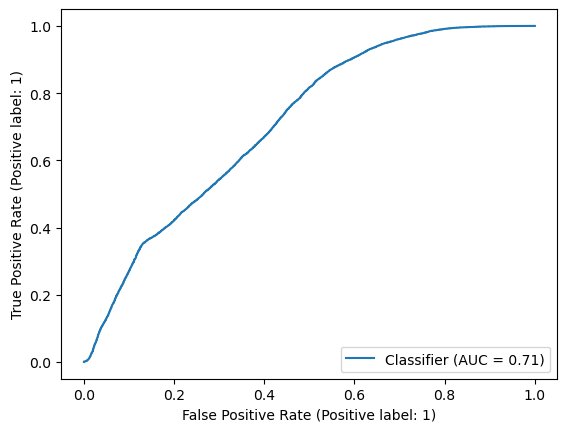

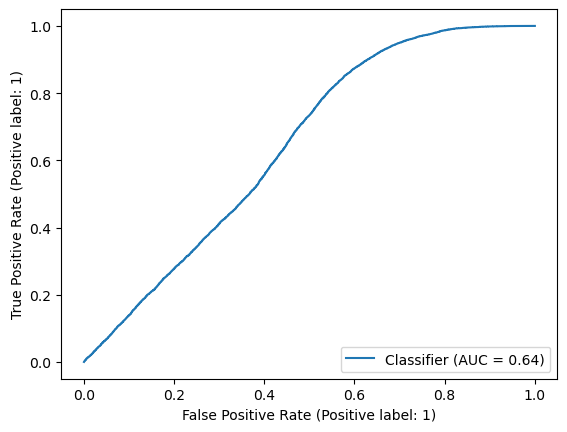

In [74]:
y_pred = np.linspace(1,0, len(sorted_df_H))
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    sorted_df_H.is_outlier,
    y_pred
)
RocCurveDisplay.from_predictions(
    sorted_df_r.is_outlier,
    y_pred
)

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppDat

<Axes: xlabel='H', ylabel='r'>

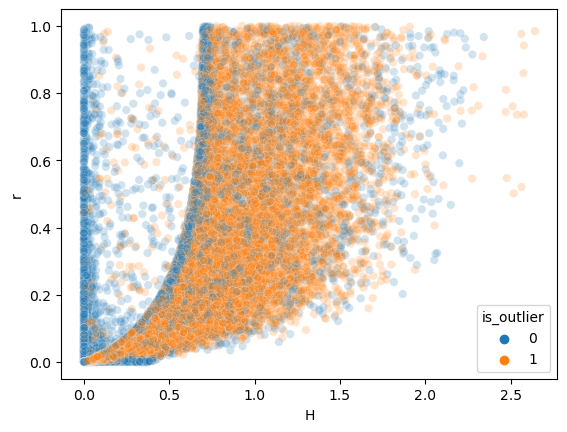

In [97]:
sns.scatterplot(df_pred,
                x="H",
                y="r",
                alpha=0.2,
                hue="is_outlier")

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppDat

<Axes: xlabel='H', ylabel='Count'>

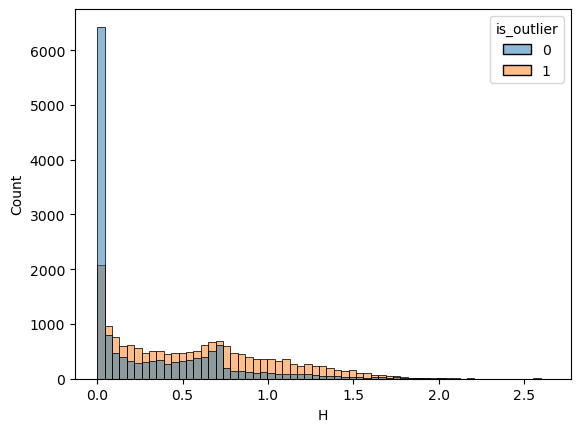

In [91]:
sns.histplot(df_pred,
             x="H",
             hue="is_outlier")

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


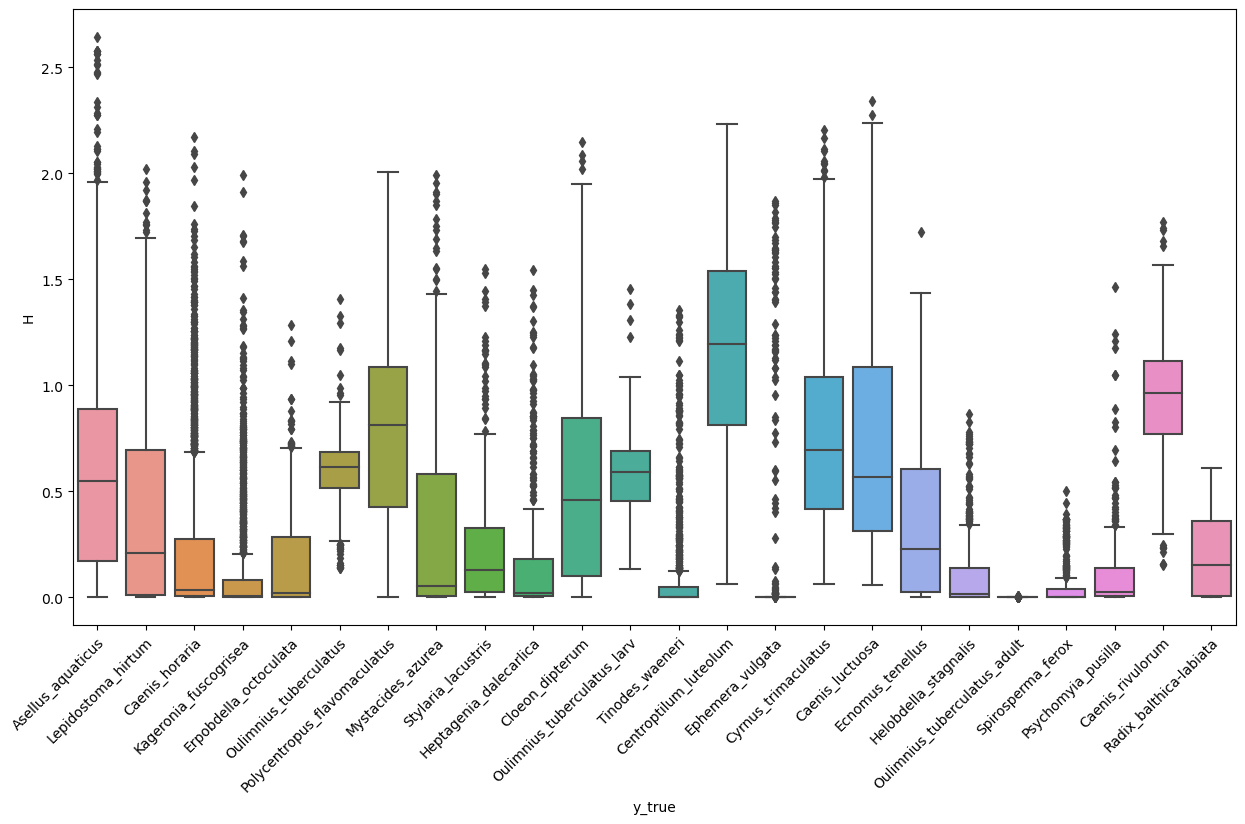

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.boxplot(data=df_pred,
            x="y_true",
            y="H")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



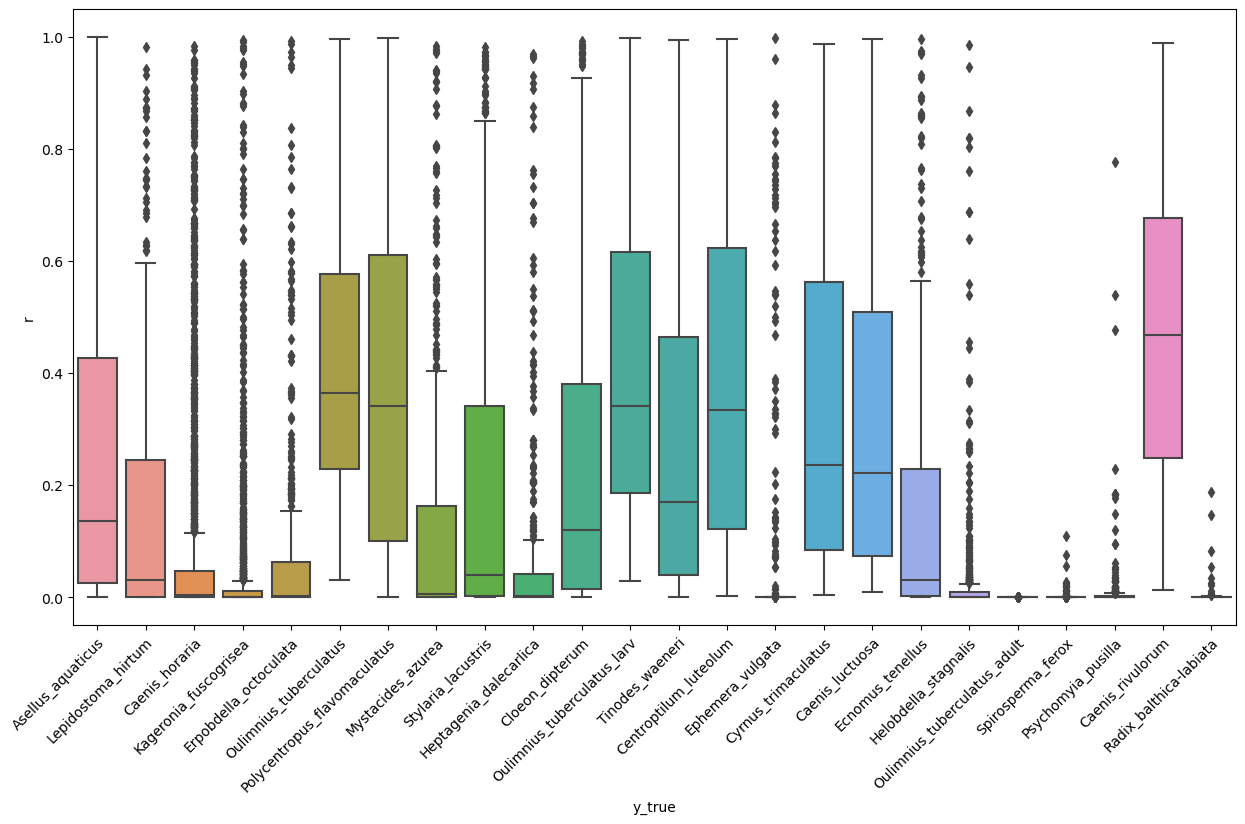

In [98]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_pred,
            x="y_true",
            y="r")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

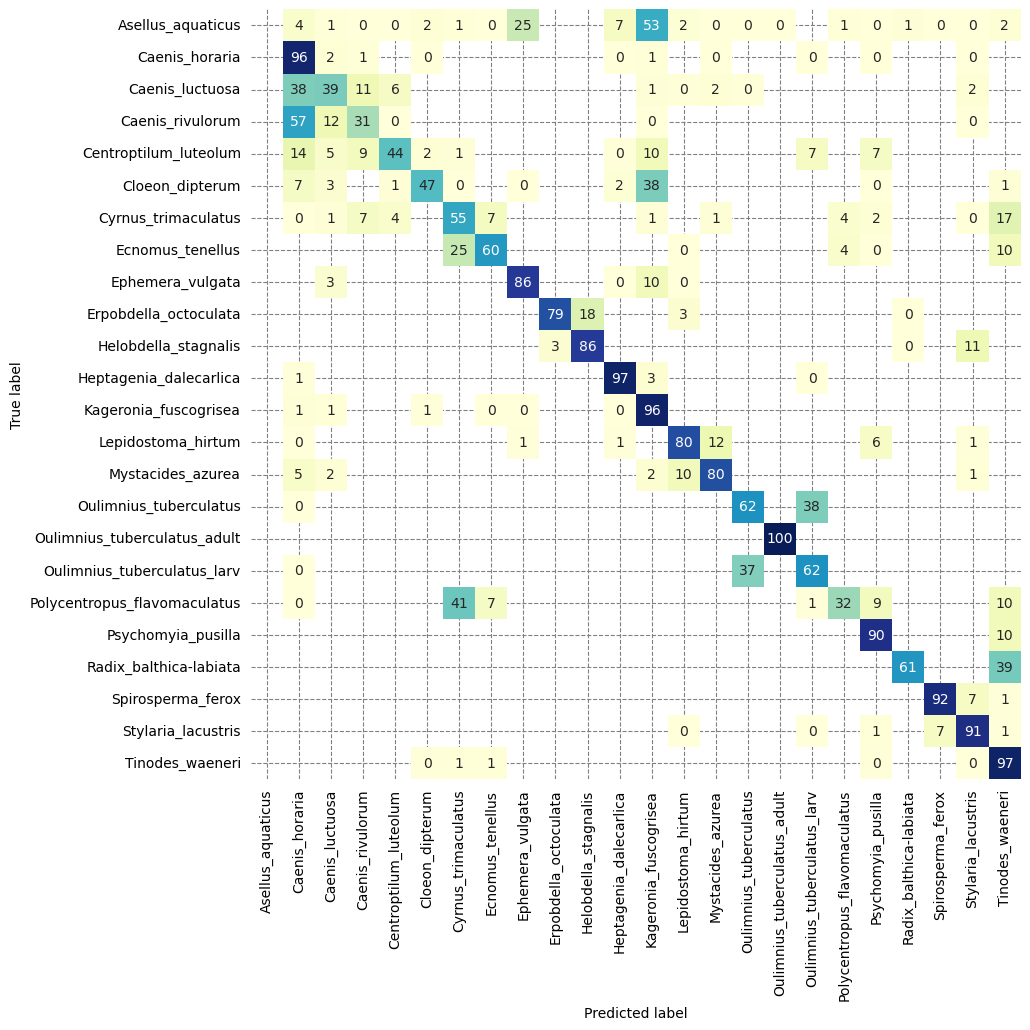

In [99]:
confusion_matrixX(df_pred.y_true, df_pred.y_pred, classes="union", figsize=(10,10), fonts=(10,10,10), grid=True)

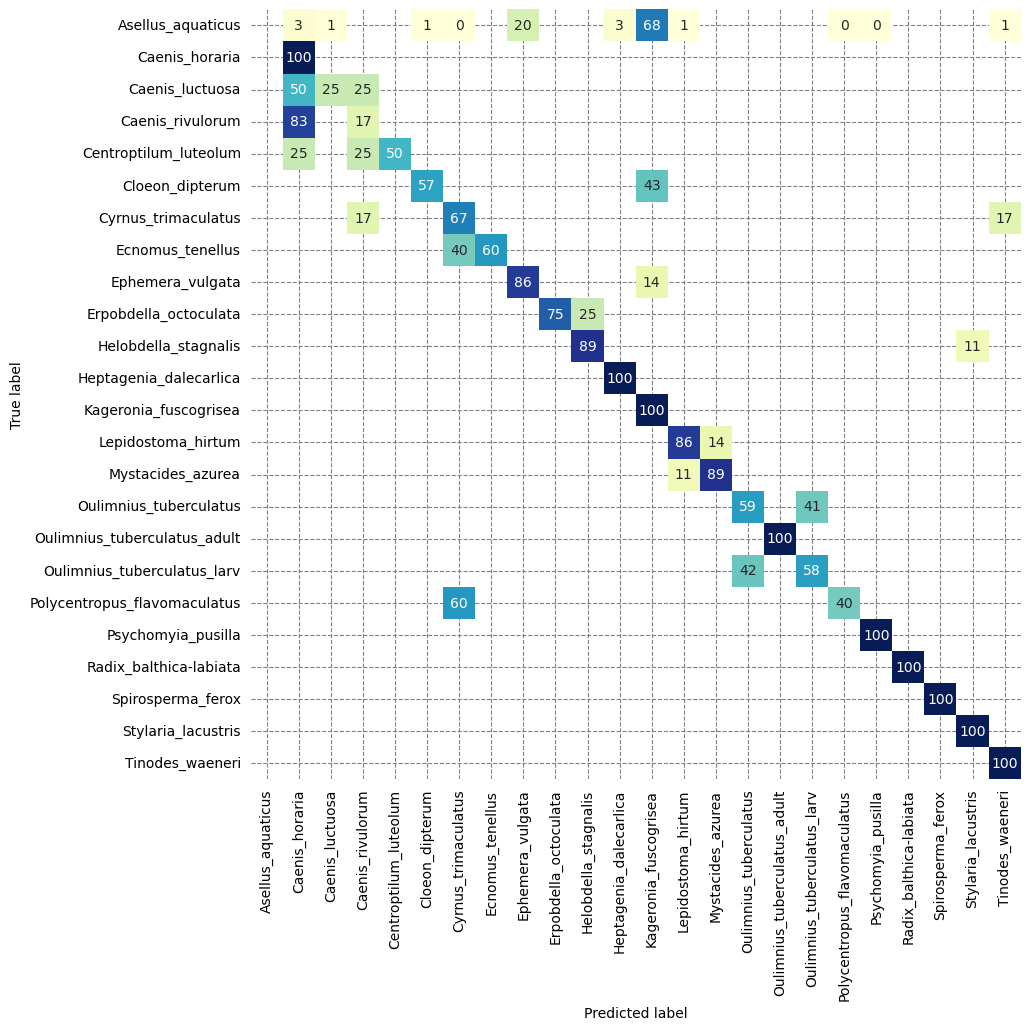

In [14]:
confusion_matrixX(df.y_true, df.y_pred, classes="union", figsize=(10,10), fonts=(10,10,10), grid=True)

In [15]:
df

,individual,y_true,y_pred
0,A-A2-AsAq-ala1-1,Asellus_aquaticus,Kageronia_fuscogrisea
1,A-A5-AsAq-ala1-2,Asellus_aquaticus,Kageronia_fuscogrisea
2,A-A6-AsAq-ala1-3,Asellus_aquaticus,Kageronia_fuscogrisea
3,A-A7-AsAq-ala1-4,Asellus_aquaticus,Kageronia_fuscogrisea
4,A-B2-LeHi-hau1-1,Lepidostoma_hirtum,Mystacides_azurea
...,...,...,...
511,Q-G1-AsAq-val1-1,Asellus_aquaticus,Kageronia_fuscogrisea
512,Q-G11-AsAq-vii2-1,Asellus_aquaticus,Kageronia_fuscogrisea
513,Q-G2-PoFl-pus3-2,Polycentropus_flavomaculatus,Cyrnus_trimaculatus
514,Q-G4-AsAq-val2-1,Asellus_aquaticus,Kageronia_fuscogrisea


In [16]:
import pickle

with open(r"..\outputs\features\features_dnaimg-loo_efficientnet_b0_f0_231219-2114-6cc8_epoch06_val-loss0.44_none_pooled.p", "rb") as f:
    features = pickle.load(f)
F_test = np.concatenate(features["features"])

with open(r"..\outputs\features\features_trainset_dnaimg-loo_efficientnet_b0_f0_231219-2114-6cc8_epoch06_val-loss0.44_none_pooled.p", "rb") as f:
    features = pickle.load(f)
F_train = np.concatenate(features["features"])

In [17]:
from sklearn.preprocessing import normalize
def process_features(F,df_ref):
 
    # Normalize
    Fnorm = normalize(F, axis=1)

    # Image-level vectors
    img_features = pd.concat((df_ref[["individual", "taxon", "img"]], pd.DataFrame(Fnorm)),axis=1)

    # Individual-level vectors
    individual_features = img_features.drop(["taxon", "img"], axis=1).groupby("individual").sum()
    individual_features.iloc[:,:] = normalize(individual_features.values,axis=1)
    individual_features = pd.concat((img_features.groupby("individual")["taxon"].first(), individual_features), axis=1)

    # Taxon-level vectors
    taxon_features = img_features.drop(["individual", "img"], axis=1).groupby("taxon").sum()
    taxon_features.iloc[:,:] = normalize(taxon_features.values,axis=1)

    features = {}
    features["img"] = img_features
    features["img_values"] = img_features.values[:,3:]
    features["individual"] = individual_features
    features["individual_values"] = individual_features.values[:,1:]
    features["taxon"] = taxon_features
    return features

df_F_train = process_features(F_train, df_ref_train)
df_F_test = process_features(F_test, df_ref_test)

In [18]:
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=50).fit(df_F_train["img_values"])
PCA_train = {}
PCA_train["img"] = pca.transform(df_F_train["img_values"])
PCA_train["individual"] = pca.transform(df_F_train["individual_values"])
PCA_train["taxon"] = pca.transform(df_F_train["taxon"].values)


PCA_test = {}
PCA_test["img"] = pca.transform(df_F_test["img_values"])
PCA_test["individual"] = pca.transform(df_F_test["individual_values"])
PCA_test["taxon"] = pca.transform(df_F_test["taxon"].values)

In [20]:
# embedding = MDS(n_components=2, normalized_stress="auto")
# Fnorm_MDS = embedding.fit_transform(F_PCA)
# Fnorm_MDS.shape

In [21]:
def add_name_to_PCA(pca_array, name):
    return pd.concat((pd.Series([name]*pca_array[name].shape[0], name="name"), pd.DataFrame(pca_array[name])), axis=1)

pca_concat = pd.concat((
                    pd.DataFrame(PCA_train["img"]),
                    pd.DataFrame(PCA_train["individual"]),
                    pd.DataFrame(PCA_train["taxon"]),
                    pd.DataFrame(PCA_test["img"]),
                    pd.DataFrame(PCA_test["individual"]),
                    pd.DataFrame(PCA_test["taxon"])
                    ), axis=0)
pca_concat

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.319757,-0.211823,0.296216,0.363943,-0.054080,-0.064464,0.017181,0.101721,-0.025764,0.006037,...,0.037937,0.012982,0.008717,-0.024985,0.010843,0.009086,0.015276,0.005103,0.000578,0.016127
1,0.334998,-0.263543,0.178082,0.257722,-0.155161,0.031718,0.014000,0.183503,-0.038361,-0.052121,...,0.015717,0.043509,-0.003953,-0.005427,-0.002459,-0.001662,0.001449,-0.009913,0.010788,0.006977
2,0.332568,-0.213470,0.317499,0.353048,-0.079864,-0.059944,0.033950,0.113862,-0.008979,-0.004234,...,0.036995,0.012954,0.009986,-0.031518,0.008560,0.014228,0.014103,0.003752,-0.001358,0.009658
3,0.255204,-0.218702,0.165877,0.260051,-0.164423,0.006332,0.007176,0.151197,-0.078202,-0.056410,...,0.003081,0.025465,-0.006928,0.000386,0.006945,0.001366,0.004787,-0.004364,0.005617,0.013048
4,0.351444,-0.210393,0.297640,0.359746,-0.058706,-0.056418,0.058728,0.123420,-0.000600,-0.011619,...,0.039997,0.010332,0.003918,-0.020100,0.012550,0.020057,0.015660,0.005351,0.002885,0.014358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,-0.327802,0.023319,-0.187719,0.113573,0.214946,-0.020871,0.083253,-0.038508,-0.098341,-0.046704,...,0.017400,-0.021532,-0.011446,0.008589,0.003430,-0.000779,-0.002746,-0.009706,-0.005999,0.000591
20,0.056365,0.251803,-0.139142,0.334607,-0.222640,-0.196871,0.046881,-0.002503,0.096124,0.092762,...,0.009815,-0.014262,0.020710,-0.001761,0.000585,-0.003403,-0.002249,0.001177,-0.006688,0.004797
21,-0.146527,0.502306,0.363699,-0.200004,-0.010350,0.136373,-0.118768,0.119248,-0.095717,0.005672,...,0.000171,-0.009682,0.007068,0.000382,0.008596,-0.007934,-0.005315,0.006603,0.003605,0.004366
22,-0.294339,0.196743,0.378429,-0.163109,0.070992,0.015585,-0.014738,0.055157,0.000192,0.000717,...,-0.002261,-0.001431,-0.014832,-0.004398,0.003303,-0.007506,0.001080,0.006190,-0.003411,-0.001870


In [22]:
tsne = TSNE(n_components=2).fit_transform(pca_concat.values)

In [23]:
def get_lens(df_F):
    n_img = len(df_F["img"])
    n_individual = len(df_F["individual"])
    n_taxon = len(df_F["taxon"])
    return n_img, n_individual, n_taxon

n_img_train, n_individual_train, n_taxon_train = get_lens(df_F_train)
n_img_test, n_individual_test, n_taxon_test = get_lens(df_F_test)

n_train = n_img_train+n_individual_train+n_taxon_train
n_test = n_img_test+n_individual_test+n_taxon_test

tsne_train = tsne[:n_train,:]
tsne_test = tsne[n_train:, :]

tsne_img_train = tsne_train[:n_img_train,:]
tsne_individual_train = tsne_train[n_img_train:n_img_train+n_individual_train,:]
tsne_taxon_train = tsne_train[n_img_train+n_individual_train:,:]

tsne_img_test = tsne_test[:n_img_test,:]
tsne_individual_test = tsne_test[n_img_test:n_img_test+n_individual_test,:]
tsne_taxon_test = tsne_test[n_img_test+n_individual_test:,:]

In [24]:
def concat_metadata(df_F, img, individual, taxon):
    tsne_img = pd.concat((df_F["img"][["individual", "taxon", "img"]], pd.DataFrame(img, columns=["x", "y"])), axis=1)
    tsne_individual = pd.concat((df_F["individual"].reset_index()[["individual", "taxon"]], pd.DataFrame(individual, columns=["x", "y"])), axis=1)
    tsne_taxon = pd.concat((df_F["taxon"].reset_index()["taxon"], pd.DataFrame(taxon, columns=["x", "y"])), axis=1)
    return tsne_img, tsne_individual, tsne_taxon

tsne_img_train, tsne_individual_train, tsne_taxon_train = concat_metadata(df_F_train, tsne_img_train, tsne_individual_train, tsne_taxon_train)
tsne_img_test, tsne_individual_test, tsne_taxon_test = concat_metadata(df_F_test, tsne_img_test, tsne_individual_test, tsne_taxon_test)

In [25]:
from cycler import cycler

In [26]:
from matplotlib import colormaps

cm = [colormaps["tab20"].resampled(6)(i) for i in range(6)]


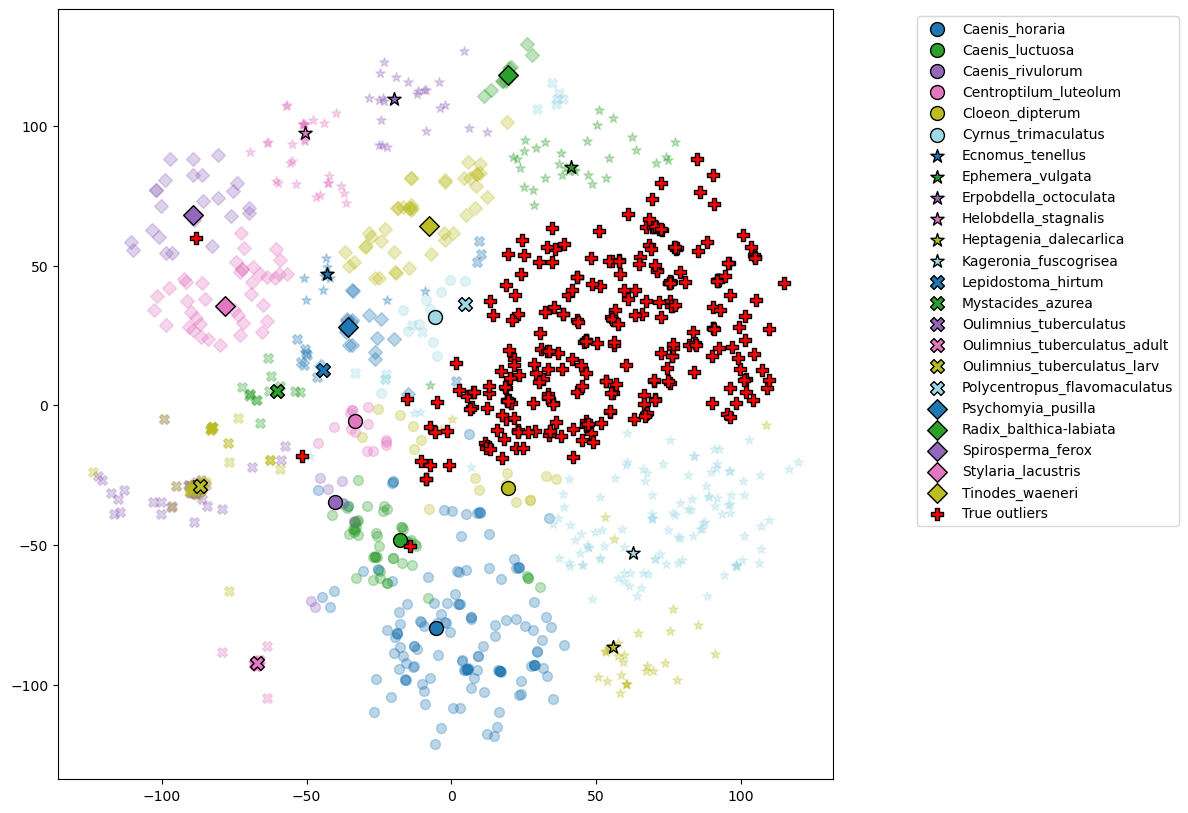

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
cc = iter(
    cycler(marker="o*XDv^")*
    cycler(color=cm)
      )

# Individual-level embeddings
groups = tsne_taxon_train.groupby("taxon")
for i, (name, group) in enumerate(groups):
    individuals = tsne_individual_train.query("taxon == @name")
    marker = next(cc)
    ax.scatter(individuals.x, individuals.y, marker=marker["marker"], s=50, alpha=0.3, color=marker["color"])
    ax.scatter(group.x, group.y, marker=marker["marker"], s=100, edgecolor="black", color=marker["color"], label=name)

outliers = tsne_individual_test.query("taxon == 'Asellus_aquaticus'")
ax.scatter(outliers.x, outliers.y, marker="P", s=80, color="red", edgecolor="black", alpha=1, label="True outliers")

ax.legend(bbox_to_anchor=(1.1, 0., 0, 1))
plt.show()



In [28]:
import plotly.express as px

px.scatter(tsne_individual_train,
           x="x",
           y="y",
           color="taxon",
           height=600,
           width=900)

In [29]:
otu_reads = pd.read_csv("../data/raw/otu_reads.csv")
otu_info = pd.read_csv("../data/raw/otu_info.csv")

read_counts = otu_reads[otu_reads.sample_name.isin(df_ref_test.individual.unique())].groupby("ID")["reads"].sum()

In [30]:
metabc_sample = otu_info[["ID","taxon", "Abbreviation", "Seq"]].join(read_counts, how="left", on="ID").set_index("ID")
metabc_sample["seq_align"] = None
metabc_sample

,taxon,Abbreviation,Seq,reads,seq_align
ID,,,,,
OTU_1,Oulimnius tuberculatus,OuTu,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,22057,None
OTU_2,Kageronia fuscogrisea,KaFu,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,16094,None
OTU_3,Asellus aquaticus,AsAq,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,36235,None
OTU_4,Asellus aquaticus,AsAq,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,33589,None
OTU_5,Stylaria lacustris,StLa,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,4466,None
...,...,...,...,...,...
OTU_94,Glyptotendipes cauliginellus,NaN,TCTATCTGCTGCAATTGCCCACAGAGGGGCCTCAGTCGACTTAGCA...,0,None
OTU_95,Tanytarsus brundini,NaN,TTATCTTCAAGAATTGCCCACAGAGGTGCTTCTGTAGATTTAGCTA...,0,None
OTU_96,Gastropoda,NaN,ATTATCTGGCTTAACTGGCCATTACGGAAGTGCTGTTGATATCGCT...,5,None


In [31]:
from scipy.spatial.distance import cdist

def jaccard(a,b):
    a = np.array([x for x in a])
    b = np.array([x for x in b])
    return np.sum(a == b)/len(a)


In [32]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO, AlignIO
from Bio.Align.Applications import MuscleCommandline

max_length = metabc_sample.Seq.map(lambda x: len(x)).max()

# Turn to SeqRecord format
records = []
for i, row in metabc_sample.iterrows():
    record = SeqRecord(
        Seq(row.Seq),
        id=row.name
    )
    records.append(record)
with open("otus.fasta", "w") as output_handle:
    SeqIO.write(records, output_handle, "fasta")

import subprocess

subprocess.run([r"..\muscle.exe",
                    "-align", "otus.fasta", 
                    "-output", "otus_align.fasta"])

CompletedProcess(args=['..\\muscle.exe', '-align', 'otus.fasta', '-output', 'otus_align.fasta'], returncode=0)

In [33]:
aligned = [x for x in SeqIO.parse("otus_align.fasta", "fasta")]
for a in aligned:
    metabc_sample.loc[a.id, "seq_align"] = str(a.seq)
metabc_sample

,taxon,Abbreviation,Seq,reads,seq_align
ID,,,,,
OTU_1,Oulimnius tuberculatus,OuTu,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,22057,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...
OTU_2,Kageronia fuscogrisea,KaFu,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,16094,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...
OTU_3,Asellus aquaticus,AsAq,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,36235,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...
OTU_4,Asellus aquaticus,AsAq,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,33589,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...
OTU_5,Stylaria lacustris,StLa,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,4466,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...
...,...,...,...,...,...
OTU_94,Glyptotendipes cauliginellus,NaN,TCTATCTGCTGCAATTGCCCACAGAGGGGCCTCAGTCGACTTAGCA...,0,TCTATCTGCTGCAATTGCCCACAGAGGGGCCTCAGTCGACTTAGCA...
OTU_95,Tanytarsus brundini,NaN,TTATCTTCAAGAATTGCCCACAGAGGTGCTTCTGTAGATTTAGCTA...,0,-TTATCTTCAAGAATTGCCCACAGAGGTGCTTCTGTAGATTTAGCT...
OTU_96,Gastropoda,NaN,ATTATCTGGCTTAACTGGCCATTACGGAAGTGCTGTTGATATCGCT...,5,ATTATCTGGCTTAACTGGCCATTACGGAAGTGCTGTTGATATCGCT...


In [34]:
seqs = []
for i,row in metabc_sample.iterrows():
    seqs.append({"id": row.name,
                 "seq": row.seq_align})
seqs

[{'id': 'OTU_1',
  'seq': 'TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCAATTTTTAGACTTCATTTAGCGGGGATTTCCTCTATTTTAGGTGCTGTTAATTTCATTACAACAGTA---ATTAATATGCGATC---CCCAGGAATAACATTTGATCGTATACCCTTATTTGTTTGATCAGTGGTAATTACGGCAGTTTTACTACTTCTCTCTCTT'},
 {'id': 'OTU_2',
  'seq': 'TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCTATTTTTTCATTACATTTAGCAGGGGTGTCTTCTATTTTAGGAGCAGTAAATTTTATTACAACTACT---ATTAATATACGTTC---TAGAGGAATAACAATGGATCGAATTCCGTTGTTTGTTTGATCTGTATTGATTACTGCTATTTTATTATTGTTATCTCTT'},
 {'id': 'OTU_3',
  'seq': 'GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGAATTTTTTCTTTACACTTAGCTGGGGCTAGTTCTATTTTAGGCTCTGTTAATTTTATCTCAACAGTT---ATTAATATGCGCGC---AGAAGGCATAAGATTTGATAAGGTTCCTTTGTTTGTGTGGTCAGTATTTTTAACTACTATTTTACTTCTACTTTCTCTA'},
 {'id': 'OTU_4',
  'seq': 'GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGAATTTTTTCCTTACACTTAGCCGGAGCTAGTTCTTTTCTAGGCTCTGTTAATTTTATCTCAACAGTT---ATTAATATACGTGC---AGAAGGCATAAGATTTGATAAAGTCCCTTTGTTTGTATGATCAGTGTTTTTAACCACCATTTTGCTTCTCCTTTCTCTA'},
 {'id': 'OTU_5',
  'seq': 'TCTAT

In [35]:
D = pd.DataFrame(index=metabc_sample.index, columns=metabc_sample.index)
for s1 in seqs:
    for s2 in seqs:
        d = jaccard(s1["seq"], s2["seq"])
        print(d)
        print(s1["id"], s2["id"])
        D.loc[s1["id"], s2["id"]] = d
D

1.0
OTU_1 OTU_1
0.7535545023696683
OTU_1 OTU_2
0.7156398104265402
OTU_1 OTU_3
0.6872037914691943
OTU_1 OTU_4
0.6919431279620853
OTU_1 OTU_5
0.7014218009478673
OTU_1 OTU_6
0.6635071090047393
OTU_1 OTU_7
0.7203791469194313
OTU_1 OTU_8
0.6635071090047393
OTU_1 OTU_9
0.7440758293838863
OTU_1 OTU_10
0.6587677725118484
OTU_1 OTU_11
0.6729857819905213
OTU_1 OTU_12
0.6919431279620853
OTU_1 OTU_13
0.7156398104265402
OTU_1 OTU_14
0.7109004739336493
OTU_1 OTU_15
0.6824644549763034
OTU_1 OTU_16
0.7914691943127962
OTU_1 OTU_17
0.7772511848341233
OTU_1 OTU_18
0.7867298578199052
OTU_1 OTU_19
0.6445497630331753
OTU_1 OTU_20
0.7061611374407583
OTU_1 OTU_21
0.6919431279620853
OTU_1 OTU_22
0.919431279620853
OTU_1 OTU_23
0.6635071090047393
OTU_1 OTU_24
0.7582938388625592
OTU_1 OTU_25
0.7061611374407583
OTU_1 OTU_26
0.6729857819905213
OTU_1 OTU_27
0.6966824644549763
OTU_1 OTU_28
0.7156398104265402
OTU_1 OTU_29
0.7109004739336493
OTU_1 OTU_30
0.6919431279620853
OTU_1 OTU_31
0.6587677725118484
OTU_1 OTU_32
0

ID,OTU_1,OTU_2,OTU_3,OTU_4,OTU_5,OTU_6,OTU_7,OTU_8,OTU_9,OTU_10,...,OTU_88,OTU_89,OTU_90,OTU_92,OTU_93,OTU_94,OTU_95,OTU_96,OTU_98,OTU_99
ID,,,,,,,,,,,,,,,,,,,,,
OTU_1,1.0,0.753555,0.71564,0.687204,0.691943,0.701422,0.663507,0.720379,0.663507,0.744076,...,0.654028,0.701422,0.672986,0.720379,0.7109,0.767773,0.772512,0.649289,0.63981,0.559242
OTU_2,0.753555,1.0,0.706161,0.677725,0.691943,0.763033,0.677725,0.810427,0.682464,0.758294,...,0.677725,0.767773,0.682464,0.739336,0.734597,0.744076,0.791469,0.682464,0.658768,0.587678
OTU_3,0.71564,0.706161,1.0,0.909953,0.677725,0.649289,0.611374,0.71564,0.663507,0.63981,...,0.625592,0.635071,0.625592,0.658768,0.649289,0.706161,0.734597,0.606635,0.649289,0.559242
OTU_4,0.687204,0.677725,0.909953,1.0,0.682464,0.64455,0.611374,0.672986,0.64455,0.630332,...,0.601896,0.649289,0.611374,0.63981,0.635071,0.696682,0.701422,0.606635,0.611374,0.559242
OTU_5,0.691943,0.691943,0.677725,0.682464,1.0,0.658768,0.668246,0.729858,0.753555,0.658768,...,0.635071,0.663507,0.63981,0.672986,0.616114,0.725118,0.706161,0.620853,0.620853,0.57346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_94,0.767773,0.744076,0.706161,0.696682,0.725118,0.739336,0.677725,0.78673,0.706161,0.744076,...,0.601896,0.744076,0.616114,0.672986,0.654028,1.0,0.819905,0.635071,0.616114,0.592417
OTU_95,0.772512,0.791469,0.734597,0.701422,0.706161,0.720379,0.696682,0.729858,0.658768,0.744076,...,0.63981,0.7109,0.649289,0.7109,0.668246,0.819905,1.0,0.630332,0.630332,0.587678
OTU_96,0.649289,0.682464,0.606635,0.606635,0.620853,0.63981,0.630332,0.606635,0.611374,0.635071,...,0.654028,0.630332,0.668246,0.696682,0.691943,0.635071,0.630332,1.0,0.672986,0.540284


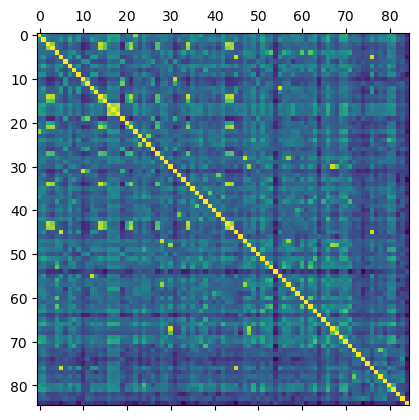

In [36]:
plt.matshow(D.values.astype(np.float64))

In [37]:
D.sum().sort_values()

ID
OTU_99    49.199052
OTU_60    50.701422
OTU_87    52.260664
OTU_71    52.563981
OTU_96    53.099526
            ...    
OTU_79    60.677725
OTU_56    60.767773
OTU_17    61.170616
OTU_81    61.222749
OTU_73    61.758294
Length: 85, dtype: object

In [38]:
tsne2 = TSNE(n_components=2, metric="precomputed", init="random").fit_transform(D)
metabc_sample["tsne_x"] = tsne2[:,0]
metabc_sample["tsne_y"] = tsne2[:,1]

In [39]:
mds = MDS(n_components=2, normalized_stress="auto", dissimilarity="precomputed").fit_transform(D.values)
metabc_sample["mds_x"] = mds[:,0]
metabc_sample["mds_y"] = mds[:,1]
metabc_sample

,taxon,Abbreviation,Seq,reads,seq_align,tsne_x,tsne_y,mds_x,mds_y
ID,,,,,,,,,
OTU_1,Oulimnius tuberculatus,OuTu,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,22057,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,2.591341,3.313568,-0.416600,-0.384637
OTU_2,Kageronia fuscogrisea,KaFu,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,16094,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,2.000741,0.107716,-0.551970,-0.162687
OTU_3,Asellus aquaticus,AsAq,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,36235,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,2.023898,1.442226,0.303754,-0.355197
OTU_4,Asellus aquaticus,AsAq,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,33589,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,2.435715,1.285144,0.024628,0.425356
OTU_5,Stylaria lacustris,StLa,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,4466,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,2.281165,2.894760,0.436481,0.319581
...,...,...,...,...,...,...,...,...,...
OTU_94,Glyptotendipes cauliginellus,NaN,TCTATCTGCTGCAATTGCCCACAGAGGGGCCTCAGTCGACTTAGCA...,0,TCTATCTGCTGCAATTGCCCACAGAGGGGCCTCAGTCGACTTAGCA...,1.735929,0.546302,0.107504,0.547483
OTU_95,Tanytarsus brundini,NaN,TTATCTTCAAGAATTGCCCACAGAGGTGCTTCTGTAGATTTAGCTA...,0,-TTATCTTCAAGAATTGCCCACAGAGGTGCTTCTGTAGATTTAGCT...,2.971006,0.238523,0.323976,0.454002
OTU_96,Gastropoda,NaN,ATTATCTGGCTTAACTGGCCATTACGGAAGTGCTGTTGATATCGCT...,5,ATTATCTGGCTTAACTGGCCATTACGGAAGTGCTGTTGATATCGCT...,3.117855,1.393478,-0.119341,0.027466


In [108]:
ingroup = metabc_sample[~metabc_sample["Abbreviation"].isna()]
ingroup = ingroup.query("Abbreviation != 'AsAq'")
ingroup

,taxon,Abbreviation,Seq,reads,seq_align,tsne_x,tsne_y,mds_x,mds_y
ID,,,,,,,,,
OTU_1,Oulimnius tuberculatus,OuTu,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,22057,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,2.591341,3.313568,-0.416600,-0.384637
OTU_2,Kageronia fuscogrisea,KaFu,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,16094,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,2.000741,0.107716,-0.551970,-0.162687
OTU_5,Stylaria lacustris,StLa,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,4466,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,2.281165,2.894760,0.436481,0.319581
OTU_6,Ephemera vulgata,EpVu,ATTAGCAGCAGGAATTGCCCATGCTGGGGCATCCGTTGACCTTGCC...,1736,ATTAGCAGCAGGAATTGCCCATGCTGGGGCATCCGTTGACCTTGCC...,2.526339,2.395126,0.486032,0.044238
OTU_7,Tinodes waeneri,TiWa,ATTATCTAACAGAATATTTCACTCAGGGAAAGCTGTTGATATTAGA...,2528,ATTATCTAACAGAATATTTCACTCAGGGAAAGCTGTTGATATTAGA...,2.077939,1.678721,-0.064492,0.317462
OTU_8,Heptagenia dalecarlica,HeDa,ACTTTCTGCGGGCATTGCTCACGCTGGAGCCTCAGTAGACTTAGCC...,1185,ACTTTCTGCGGGCATTGCTCACGCTGGAGCCTCAGTAGACTTAGCC...,0.991322,1.515265,-0.543520,0.131604
OTU_9,Spirosperma ferox,SpFe,TTTAGCTGGCAACCTCGCCCACTCCGGCCCTTCAGTAGACTTAGCA...,1170,TTTAGCTGGCAACCTCGCCCACTCCGGCCCTTCAGTAGACTTAGCA...,2.889737,2.468809,-0.067069,0.394411
OTU_10,Caenis luctuosa,CaLu,TTTAGCCGCCGGAATTGCCCACGCCGGAGCCTCCGTTGATTTAGCA...,610,TTTAGCCGCCGGAATTGCCCACGCCGGAGCCTCCGTTGATTTAGCA...,2.244938,2.187293,0.158493,0.314126
OTU_11,Ecnomus tenellus,EcTe,ATTATCCAATTACAATTTCCATATAGGAAAAGCAGTTGATATCTCA...,1651,ATTATCCAATTACAATTTCCATATAGGAAAAGCAGTTGATATCTCA...,2.499336,1.458556,0.093486,0.175208


In [112]:
outliner_candidate_dna = metabc_sample[~metabc_sample.index.isin(ingroup.index)].sort_values("reads", ascending=False)
outliner_candidate_dna

,taxon,Abbreviation,Seq,reads,seq_align,tsne_x,tsne_y,mds_x,mds_y
ID,,,,,,,,,
OTU_3,Asellus aquaticus,AsAq,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,36235,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,2.023898,1.442226,0.303754,-0.355197
OTU_4,Asellus aquaticus,AsAq,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,33589,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,2.435715,1.285144,0.024628,0.425356
OTU_15,Asellus aquaticus,AsAq,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,7911,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,1.845708,1.195286,0.428504,-0.284306
OTU_16,Asellus aquaticus,AsAq,ACTAGCCGCAAGTATTGCACACAGCGGTCCTTCTGTGGATTTAGGA...,5085,ACTAGCCGCAAGTATTGCACACAGCGGTCCTTCTGTGGATTTAGGA...,2.448263,1.620717,0.290463,-0.019031
OTU_21,Asellus aquaticus,AsAq,CCTAGCAGCAAGCATTGCCCATAGTGGCCCTTCTGTAGATCTCTGA...,3378,CCTAGCAGCAAGCATTGCCCATAGTGGCCCTTCTGTAGATCTCTGA...,3.042205,1.869191,-0.307634,0.196759
OTU_22,Asellus,NaN,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGACTTAGAA...,2982,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGACTTAGAA...,2.098338,1.368221,0.012708,-0.445483
OTU_28,Asellus aquaticus,AsAq,ATTAGCAGCAAGCATTGCTCACAGTGGTCCTTCTGTAAATCTAGGA...,1805,ATTAGCAGCAAGCATTGCTCACAGTGGTCCTTCTGTAAATCTAGGA...,2.719347,1.484910,0.267156,0.298707
OTU_36,Asellus aquaticus,AsAq,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,925,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,2.270615,1.505429,-0.196936,-0.359919
OTU_23,Oulimnius,NaN,TTCATCTGCTAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,679,TTCATCTGCTAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,3.050748,3.010417,0.376616,0.374596


In [40]:
taxa = metabc_sample.taxon.unique()
taxa

array(['Oulimnius tuberculatus', 'Kageronia fuscogrisea',
       'Asellus aquaticus', 'Stylaria lacustris', 'Ephemera vulgata',
       'Tinodes waeneri', 'Heptagenia dalecarlica', 'Spirosperma ferox',
       'Caenis luctuosa', 'Ecnomus tenellus', 'Cyrnus trimaculatus',
       'Caenis horaria', 'Caenis rivulorum', 'Cloeon dipterum',
       'Polycentropus flavomaculatus', 'Asellus', 'Oulimnius',
       'Lepidostoma', 'Glyptotendipes pallens', 'Lepidostoma hirtum',
       'Psychomyia pusilla', 'Erpobdella', 'Mystacides azureus',
       'Helobdella stagnalis', 'Cyprididae', 'Lumbriculus variegatus',
       'Bithynia tentaculata', 'Radix balthica',
       'Pseudochironomus prasinatus', 'Psammoryctides barbatus',
       'Radix auricularia', 'Eurycercus lamellatus', 'Cypridopsis vidua',
       'Psectrocladius sordidellus', 'Eudiaptomus graciloides',
       'Glyptotendipes paripes', 'Cecidomyiidae',
       'Paratanytarsus inopertus', 'Chaetogaster cristallinus',
       'Nais communis', 'Lepido

In [41]:
import pygbif
from tqdm.notebook import tqdm

suggestions = []
for t in tqdm(taxa):
    suggestions.append((t, pygbif.species.name_suggest(t)))

  0%|          | 0/66 [00:00<?, ?it/s]

In [42]:
suggestions[63][1][0]

{'key': 225,
 'nameKey': 4612650,
 'kingdom': 'Animalia',
 'phylum': 'Mollusca',
 'kingdomKey': 1,
 'phylumKey': 52,
 'classKey': 225,
 'parent': 'Mollusca',
 'parentKey': 52,
 'nubKey': 225,
 'scientificName': 'Gastropoda',
 'canonicalName': 'Gastropoda',
 'rank': 'CLASS',
 'status': 'ACCEPTED',
 'synonym': False,
 'higherClassificationMap': {'1': 'Animalia', '52': 'Mollusca'},
 'class': 'Gastropoda'}

In [43]:
def parse_suggestions(s):
    if len(s[1])==0:
        return [None]*8 + [s[0]]
    first_s = s[1][0]
    parents = list(first_s["higherClassificationMap"].values())
    parents.append(first_s["canonicalName"])
    n_parents = len(parents)
    parents = parents + [None]*(8-n_parents)
    parents.append(s[0])
    return parents

parsed_suggestions = [parse_suggestions(s) for s in suggestions] 

In [44]:
hierarchy_tree = pd.DataFrame(np.asarray(parsed_suggestions), columns=["kingdom","phylum","class","order","family","genus","species","type","label"])
assert hierarchy_tree["label"].is_unique
hierarchy_tree = hierarchy_tree.set_index("label")
hierarchy_tree

,kingdom,phylum,class,order,family,genus,species,type
label,,,,,,,,
Oulimnius tuberculatus,Animalia,Arthropoda,Insecta,Coleoptera,Elmidae,Oulimnius,Oulimnius tuberculatus,None
Kageronia fuscogrisea,Animalia,Arthropoda,Insecta,Ephemeroptera,Heptageniidae,Kageronia,Kageronia fuscogrisea,None
Asellus aquaticus,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,Asellus aquaticus,None
Stylaria lacustris,Animalia,Annelida,Clitellata,Tubificida,Naididae,Stylaria,Stylaria lacustris,None
Ephemera vulgata,Animalia,Arthropoda,Insecta,Ephemeroptera,Ephemeridae,Ephemera,Ephemera vulgata,None
...,...,...,...,...,...,...,...,...
Glyptotendipes cauliginellus,Animalia,Arthropoda,Insecta,Diptera,Chironomidae,Glyptotendipes,Glyptotendipes gripekoveni,Glyptotendipes cauliginellus
Tanytarsus brundini,Animalia,Arthropoda,Insecta,Diptera,Chironomidae,Tanytarsus,Tanytarsus brundini,None
Gastropoda,Animalia,Mollusca,Gastropoda,None,None,None,None,None


In [45]:
otu_df = metabc_sample.merge(hierarchy_tree, how="left", left_on="taxon", right_index=True)
otu_df

,taxon,Abbreviation,Seq,reads,seq_align,tsne_x,tsne_y,mds_x,mds_y,kingdom,phylum,class,order,family,genus,species,type
ID,,,,,,,,,,,,,,,,,
OTU_1,Oulimnius tuberculatus,OuTu,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,22057,TTTATCTGCCAACATTGCCCATAGAGGATCATCTGTTGATTTAGCA...,2.591341,3.313568,-0.416600,-0.384637,Animalia,Arthropoda,Insecta,Coleoptera,Elmidae,Oulimnius,Oulimnius tuberculatus,None
OTU_2,Kageronia fuscogrisea,KaFu,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,16094,TTTATCAGCAGGAATTGCTCATGCCGGAGCTTCGGTTGATTTAGCT...,2.000741,0.107716,-0.551970,-0.162687,Animalia,Arthropoda,Insecta,Ephemeroptera,Heptageniidae,Kageronia,Kageronia fuscogrisea,None
OTU_3,Asellus aquaticus,AsAq,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,36235,GCTAGCTGCAAGCATTGCACACAGTGGTCCTTCTGTAGATTTAGGA...,2.023898,1.442226,0.303754,-0.355197,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,Asellus aquaticus,None
OTU_4,Asellus aquaticus,AsAq,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,33589,GCTAGCTGCAAGTATTGCACACAGTGGTCCTTCTGTAGATTATGGA...,2.435715,1.285144,0.024628,0.425356,Animalia,Arthropoda,Malacostraca,Isopoda,Asellidae,Asellus,Asellus aquaticus,None
OTU_5,Stylaria lacustris,StLa,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,4466,TCTATCTAGAAATTTAGCACACGCTGGTCCATCAGTAGATATGGCT...,2.281165,2.894760,0.436481,0.319581,Animalia,Annelida,Clitellata,Tubificida,Naididae,Stylaria,Stylaria lacustris,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_94,Glyptotendipes cauliginellus,NaN,TCTATCTGCTGCAATTGCCCACAGAGGGGCCTCAGTCGACTTAGCA...,0,TCTATCTGCTGCAATTGCCCACAGAGGGGCCTCAGTCGACTTAGCA...,1.735929,0.546302,0.107504,0.547483,Animalia,Arthropoda,Insecta,Diptera,Chironomidae,Glyptotendipes,Glyptotendipes gripekoveni,Glyptotendipes cauliginellus
OTU_95,Tanytarsus brundini,NaN,TTATCTTCAAGAATTGCCCACAGAGGTGCTTCTGTAGATTTAGCTA...,0,-TTATCTTCAAGAATTGCCCACAGAGGTGCTTCTGTAGATTTAGCT...,2.971006,0.238523,0.323976,0.454002,Animalia,Arthropoda,Insecta,Diptera,Chironomidae,Tanytarsus,Tanytarsus brundini,None
OTU_96,Gastropoda,NaN,ATTATCTGGCTTAACTGGCCATTACGGAAGTGCTGTTGATATCGCT...,5,ATTATCTGGCTTAACTGGCCATTACGGAAGTGCTGTTGATATCGCT...,3.117855,1.393478,-0.119341,0.027466,Animalia,Mollusca,Gastropoda,None,None,None,None,None


In [46]:
px.scatter(otu_df,
           x="tsne_x",
           y="tsne_y",
           color="order",
           height=600,
           width=900)

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppData\Local\miniconda3\envs\taxonomist\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\E1007914\AppDat

<Axes: xlabel='mds_x', ylabel='mds_y'>

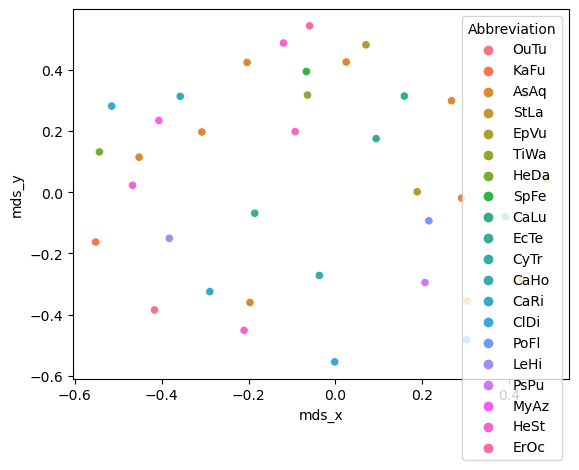

In [47]:
sns.scatterplot(metabc_sample,
                x="mds_x",
                y="mds_y",
                hue="Abbreviation")